In [6]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm



raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\spettro_am\spettro_Am_50mm2.dat")

data1 = []

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)

data = np.array(data1)

signal = []

for i in range(len(data)):
    if data[i] > 4400 and data[i] < 6000 : signal.append(data[i])



def model(x, N1, N2, N3, N4, mu1, mu2, mu3, mu4, sigma1, sigma2, sigma3, sigma4):
    return N1*norm.cdf(x, loc = mu1, scale = sigma1) + N2*norm.cdf(x, loc=mu2, scale=sigma2) + N3*norm.cdf(x, loc=mu3, scale=sigma3) + N4*norm.cdf(x, loc=mu4, scale=sigma4)

N1_ext = 0
N2_ext = 0
N3_ext = 0
N4_ext = 0

for i in range(4925, 5000): #picco1 (più a dx)
    N1_ext = N1_ext + raw_data[i]

for i in range(4875, 4925): #picco2
    N2_ext = N2_ext + raw_data[i]

for i in range(4800, 4875): #picco3
    N3_ext = N3_ext + raw_data[i]
    
for i in range(4575, 4650): #picco4 (più a sx, è la contaminazione)
    N4_ext = N4_ext + raw_data[i]


#bin_content, bin_edges,_ = plt.hist(signal, bins = 300)
numbins=[]
chi2=[]

#c = int(np.ceil(1 + np.log(len(signal)/np.log(2))))
    
for nbins in range(597, 600):
       
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    N_events = sum(bin_content)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N1 = N1_ext, N2= N2_ext, N3 = N3_ext, N4 = N4_ext, mu1 = 4950 , mu2 = 4900, mu3 = 4875, mu4 = 4650, sigma1 = 10, sigma2 = 10, sigma3 = 5, sigma4 = 15)
    my_minuit.migrad()
        
        
    #print(my_minuit.valid, my_minuit.fmin.reduced_chi2)
    if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0 )):
        chi2.append(my_minuit.fval/my_minuit.ndof)
        numbins.append(nbins)
        #display(my_minuit)

    
index = np.array(chi2).argmin() #dove c'è il fit migliore


    
nbins = numbins[index]
    
bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
N_events = sum(bin_content)
    
costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
my_minuit = Minuit(costf, N1 = N1_ext, N2= N2_ext, N3 = N3_ext, N4 = N4_ext, mu1 = 4950 , mu2 = 4900, mu3 = 4875, mu4 = 4650, sigma1 = 10, sigma2 = 10, sigma3 = 5, sigma4 = 15)
    
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)
print(nbins)



#306 3.5
#598 2.0
#850 11.4

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1161 (χ²/ndof = 2.0)       │             Nfcn = 5048              │
│ EDM = 2.86e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  9.74e3   │  0.12e3   │            │            │         │         │       │
│ 1 │ N2     │  2.02e3   │  0.10e3   │            │            │         │         │       │
│ 2 │ N3     │  2.43e3   │  0.09e3   │            │            │         │         │       │
│ 3 │ N4     │  1.50e3   │  0.04e3   │            │            │         │         │       │
│ 4 │ mu1    │ 4.93845e3 │ 0.00012e3 │            │            │         │         │       │
│ 5 │ mu2    │ 4.9057e3  │ 0.0006e3  │            │            │         │         │       │
│ 6 │ mu3    │ 4.8841e3  │ 0.0017e3  │            │            │         │         │       │
│ 7 │ mu4    │ 4.6159e3  │ 0.0033e3  │            │            │         │         │       │
│ 8 │ sigma1 │   7.82    │   0.09    │            │            │         │         │       │
│ 9 │ sigma2 │   10.6    │    0.5    │            │            │         │         │       │
│ 10│ sigma3 │   43.5    │    1.1    │            │            │         │         │       │
│ 11│ sigma4 │   93.1    │    3.1    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │       N1       N2       N3       N4      mu1      mu2      mu3      mu4   sigma1   sigma2   sigma3   sigma4 │
├────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     N1 │  1.4e+04 -0.003e6     -1e3      0e3   -4.424   -26.74    -30.5       -3    4.453   -23.43     -7.9       -3 │
│     N2 │ -0.003e6 1.03e+04     -5e3   -0.6e3    5.465    26.51    -71.7      -62   -4.028    39.99     47.1      -61 │
│     N3 │     -1e3     -5e3  8.2e+03    0.2e3   -0.945     0.33     85.0       23   -0.504   -14.64    -23.1       18 │
│     N4 │      0e3   -0.6e3    0.2e3 1.97e+03   -0.098    -0.10     19.3       41    0.054    -1.95    -15.8       54 │
│    mu1 │   -4.424    5.465   -0.945   -0.098   0.0132    0.036   -0.010   -0.010   -0.005    0.034    0.009   -0.009 │
│    mu2 │   -26.74    26.51     0.33    -0.10    0.036    0.313     0.00    -0.01   -0.031     0.18     0.01    -0.01 │
│    mu3 │    -30.5    -71.7     85.0     19.3   -0.010     0.00     2.81      1.9   -0.017    -0.18     -0.7      2.0 │
│    mu4 │       -3      -62       23       41   -0.010    -0.01      1.9     10.9    0.005    -0.19     -1.6        4 │
│ sigma1 │    4.453   -4.028   -0.504    0.054   -0.005   -0.031   -0.017    0.005   0.0089   -0.027   -0.012    0.005 │
│ sigma2 │   -23.43    39.99   -14.64    -1.95    0.034     0.18    -0.18    -0.19   -0.027    0.289     0.17    -0.19 │
│ sigma3 │     -7.9     47.

598


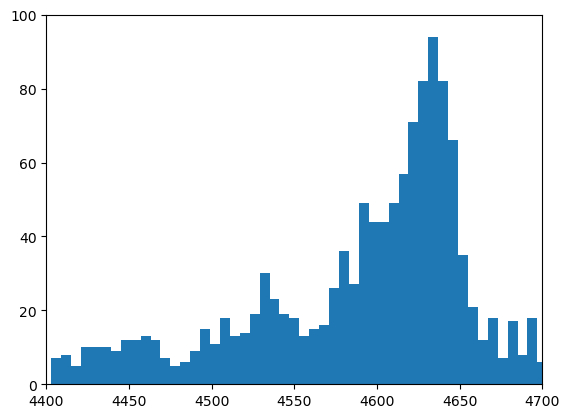

In [84]:
plt.hist(signal, bins=100)
plt.xlim(4400, 4700)
plt.ylim(0,100)
plt.show()
print()

In [64]:
# da calibrazione
#En(ch) = a * ch + b

a = 11.3e-4
err_a = 4.8e-4

b = -0.0739
err_b = 2e-3

En_Am1= a*my_minuit.values[4] + b#En picco a dx (più alto)
err1 = a*my_minuit.errors[4]

En_Am2=a*my_minuit.values[5] + b
err2 = a*my_minuit.errors[5]

En_Am3=a*my_minuit.values[6]+b #En picco a sx
err3 = a*my_minuit.errors[6]

En_cont= a*my_minuit.values[7]+b #En contaminazione
errcont = a*my_minuit.errors[7]

#En_cont=4627*a+b

E1_exp = 5.486 #in Mev
E2_exp = 5.443
E3_exp = 5.389
#EC_exp = 

t1 = abs(En_Am1 - E1_exp)/err1
t2 = abs(En_Am2 - E2_exp)/err2
t3 = abs(En_Am3 - E3_exp)/err3

print(f" En +- err \t E aspettata \t t-test \n")

print(f" {En_Am1:.5f} +- {err1:.5f} \t {E1_exp:.5f} \t {t1} \n {En_Am2:.5f} +- {err2:.5f} \t {E2_exp:.5f} \t {t2} \n {En_Am3:.5f} +- {err3:.5f} \t {E3_exp:.5f} \t {t3} \n")
print(f"{En_Am1-E1_exp} {En_Am2-E2_exp} {En_Am3-E3_exp}")
print(f"{En_cont}")

 En +- err 	 E aspettata 	 t-test 

 5.50655 +- 0.00013 	 5.48600 	 158.44609083409654 
 5.46950 +- 0.00063 	 5.44300 	 41.91092603431761 
 5.44511 +- 0.00189 	 5.38900 	 29.618212049928246 

0.020552161475953845 0.026496920434135873 0.056113585293022794
5.142061662791678
